# Lab 8 - Fuzzy C-Means

Manojkumar V K
CB.EN.U4CSE17040


In [1]:
import pandas as pd
import numpy as np
from fcmeans import FCM
import seaborn as sns
from matplotlib import pyplot as plt
import skfuzzy as fuzz

from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score

## Reading the data

In [2]:
df = pd.read_csv('SPECTF_New.csv')
df.head()

,Attr_1,Attr_2,Attr_3,Attr_4,Attr_5,Attr_6,Attr_7,Attr_8,Attr_9,Attr_10,...,Attr_36,Attr_37,Attr_38,Attr_39,Attr_40,Attr_41,Attr_42,Attr_43,Attr_44,Class
0,57,69,68,75,69,74,73,71,57,61,...,58,69,67,79,77,72,70,61,65,Yes
1,76,59,82,76,80,56,74,67,67,58,...,66,73,61,71,49,53,45,29,15,Yes
2,65,62,67,68,65,67,71,71,64,56,...,63,74,63,77,79,68,70,59,56,Yes
3,70,54,66,66,76,46,74,58,68,52,...,55,65,56,65,44,73,36,51,28,Yes
4,64,64,70,75,70,71,74,71,59,60,...,66,61,56,64,65,71,73,57,63,Yes


In [3]:
df.shape

(110, 45)

## Data Cleaning and Preparation

In [4]:
df.isnull().sum()

Attr_1     0
Attr_2     0
Attr_3     0
Attr_4     0
Attr_5     0
Attr_6     0
Attr_7     0
Attr_8     0
Attr_9     0
Attr_10    0
Attr_11    0
Attr_12    0
Attr_13    0
Attr_14    0
Attr_15    0
Attr_16    0
Attr_17    0
Attr_18    0
Attr_19    0
Attr_20    0
Attr_21    0
Attr_22    0
Attr_23    0
Attr_24    0
Attr_25    0
Attr_26    0
Attr_27    0
Attr_28    0
Attr_29    0
Attr_30    0
Attr_31    0
Attr_32    0
Attr_33    0
Attr_34    0
Attr_35    0
Attr_36    0
Attr_37    0
Attr_38    0
Attr_39    0
Attr_40    0
Attr_41    0
Attr_42    0
Attr_43    0
Attr_44    0
Class      0
dtype: int64

In [5]:
df['Class'].unique()

array(['Yes', 'No'], dtype=object)

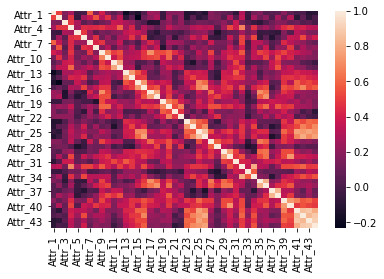

In [6]:
X = df.drop(columns=['Class'])
sns.heatmap(X.corr())

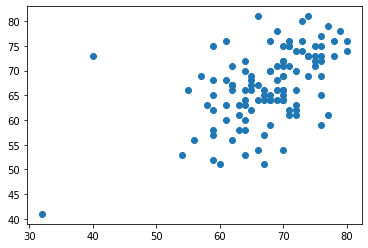

In [7]:
plt.scatter(X.values[:, 0],X.values[:, 1])

In [8]:
pca = PCA(n_components=2)
pca.fit(X)
x = pca.transform(X)

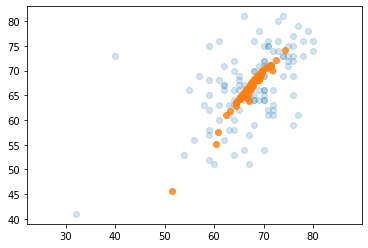

In [9]:
X_new = pca.inverse_transform(x)
plt.scatter(X.values[:, 0], X.values[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

## Model Building using Fuzzy C-Means 

### Using skfuzzy

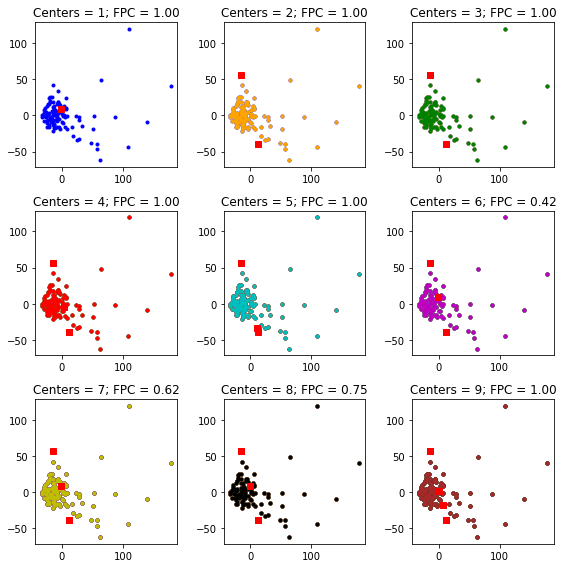

In [10]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
fpcs = []
for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(x, ncenters-1, 2, error=0.005, maxiter=1000, init=None)
    fpcs.append(fpc)
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters-1):
        ax.plot(x[:, 0], x[:, 1], '.', color=colors[j])
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')
    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters-1, fpc))
#     ax.axis('off')
fig1.tight_layout()

In [11]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(x, 2, 2, error=0.005, maxiter=1000, init=None)

Text(0, 0.5, 'Fuzzy partition coefficient')

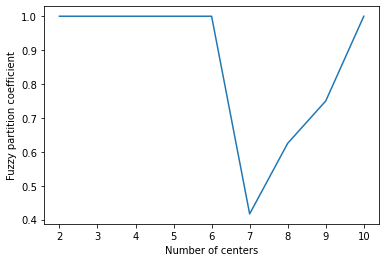

In [12]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

In [13]:
columns = list(df.columns)
features = columns[:len(columns)-1]
class_labels = list(df[columns[-1]])
dfMod = df[features]

In [14]:
pca = PCA(n_components=2)
pComp = pca.fit_transform(dfMod)
data = pd.DataFrame(data = pComp, columns = ['PCA1', 'PCA2'])
data.head()

,PCA1,PCA2
0,-14.620703,12.190320
1,56.576528,-38.863683
2,1.770004,8.140100
3,51.928467,-0.457349
4,-5.882653,18.871547


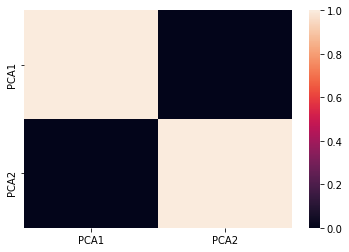

In [15]:
sns.heatmap(data.corr())

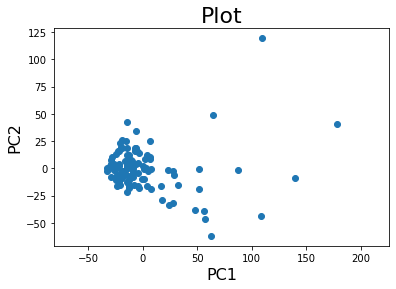

In [16]:
plt.scatter(list(data.iloc[:,0]), list(data.iloc[:,1]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('PC1', fontsize=16)                                                 
plt.ylabel('PC2', fontsize=16)                                                 
plt.title('Plot', fontsize=22)                                            
plt.show()

### Using fcmeans

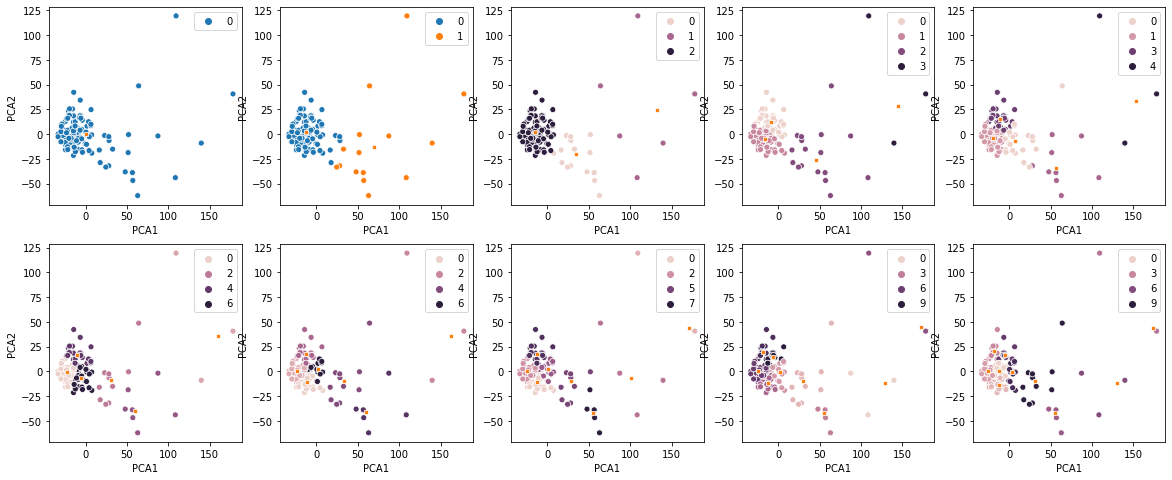

In [17]:
fig = plt.figure(figsize=(20,8))

for i in range(1,11):
    if i!=10:
        plt.subplot(250+int(i))
    else:
        plt.subplot(2,5,10)
    fcm = FCM(n_clusters=i)
    fcm.fit(data)
    fcm_centers = fcm.centers
    fcm_labels = fcm.u.argmax(axis=1)
    sns.scatterplot(pComp[:,0], pComp[:,1], hue=fcm_labels)
    sns.scatterplot(fcm_centers.iloc[:,0], fcm_centers.iloc[:,1],marker="s",s=10)
plt.show()

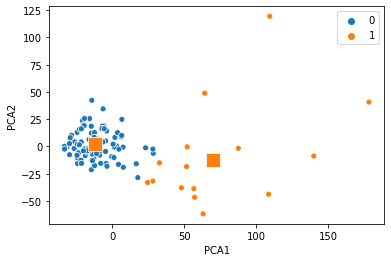

In [18]:
fcm = FCM(n_clusters=2)
fcm.fit(data)
fcm_centers = fcm.centers
fcm_labels = fcm.u.argmax(axis=1)
sns.scatterplot(pComp[:,0], pComp[:,1], hue=fcm_labels)
sns.scatterplot(fcm_centers.iloc[:,0], fcm_centers.iloc[:,1],marker="s",s=200)
plt.show()

## Final Analysis

**Inference:** FCM gives the best result for overlapped data set and comparatively better than k-means algorithm. Unlike k-means where data point must exclusively belong to one cluster center here data point is assigned membership to each cluster center as a result of which data point may belong to more than one cluster center.

In [19]:
def accuracy(cluster_labels, class_labels):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(df)):
        # Yes = 1, No = 0
        if cluster_labels[i] == 1 and class_labels[i] == 'Yes':
            tp = tp + 1
        elif cluster_labels[i] == 0 and class_labels[i] == 'No':
            tn = tn+1
        elif cluster_labels[i] == 1 and class_labels[i] == 'No':
            fp = fp + 1
        elif cluster_labels[i] == 0 and class_labels[i] == 'Yes':
            fn = fn + 1
    accuracy = (float((tp + tn))/(tp + tn + fn + fp)) * 100
    precision = (float(tp)/(tp + fp)) * 100
    recall = (float(tp)/(tp + fn)) * 100
    return accuracy, precision, recall

**Clustering parameters**

In [20]:
pred = fcm_labels
n_clusters_ = len(set(pred)) - (1 if -1 in pred else 0)
n_noise_ = list(pred).count(-1)
acc, precision, recall=accuracy(fcm_labels,class_labels)

In [21]:
print('Estimated number of clusters     : %d' % n_clusters_)
print('Estimated number of noise points : %d' % n_noise_)
print("Accuracy                         : %0.3f" % acc)
print("Precision                        : %0.3f" % precision)
print("Recall                           : %0.3f" % recall)
print("Homogeneity                      : %0.3f" %  homogeneity_score(class_labels, pred))
print("Completeness                     : %0.3f" %  completeness_score(class_labels, pred))
print("V-measure                        : %0.3f" %  v_measure_score(class_labels, pred))
print("Adjusted Rand Index              : %0.3f" %  adjusted_rand_score(class_labels, pred))
print("Adjusted Mutual Information      : %0.3f" %  adjusted_mutual_info_score(class_labels, pred))
print("Silhouette Coefficient           : %0.3f" %  silhouette_score(data.values, pred))

Estimated number of clusters     : 2
Estimated number of noise points : 0
Accuracy                         : 63.636
Precision                        : 100.000
Recall                           : 27.273
Homogeneity                      : 0.152
Completeness                     : 0.264
V-measure                        : 0.193
Adjusted Rand Index              : 0.070
Adjusted Mutual Information      : 0.186
Silhouette Coefficient           : 0.675
